## Calculando/Graficando Correlacion de valores outliers

In [2]:
import pandas as pd
import numpy as np #Paquete para manejar arreglos (vector . arreglo unidimensional - matrix - arreglo bidimensional)
import matplotlib.pyplot as plt
import json
import seaborn as sns
from scipy import stats
import imageio
import imageio.v2 as imageio
from scipy.stats import pearsonr,spearmanr, kendalltau

In [3]:
#Contaminacion de 10%, total muestra 1000

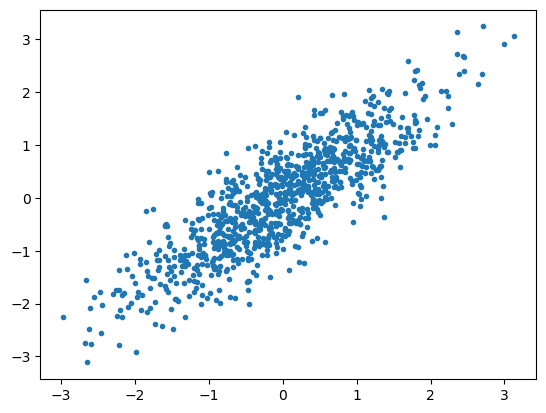

In [4]:
#Parte no contaminada
sigma = [[1,0.86],[0.86,1]]# tiene una correlacion alta
x_clean = np.random.multivariate_normal([0,0],sigma,950)
plt.plot(x_clean[:,0],x_clean[:,1],'.')

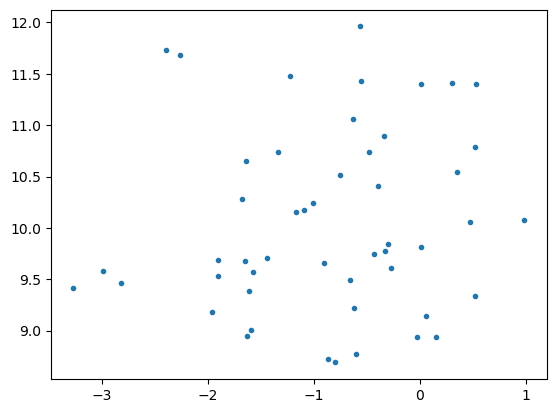

In [5]:
#Parte contaminada con correlacion 0 (np.diag([1,1]))
x_cont = np.random.multivariate_normal([-1,10],np.diag([1,1]),50) # tiene una correlacion 0 (Baja)
plt.plot(x_cont[:,0],x_cont[:,1],'.')

In [6]:
#Las unimos para tener datos con contaminacion
x = np.concatenate((x_clean,x_cont), axis=0)

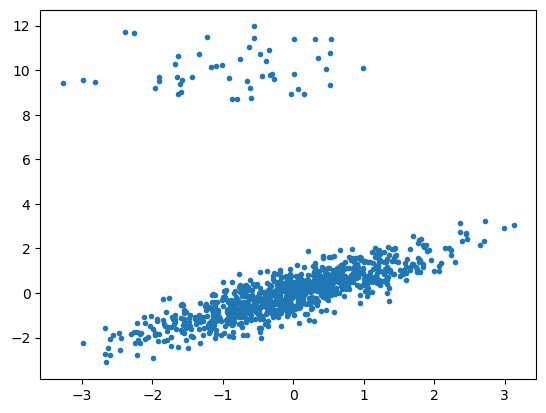

In [7]:
plt.plot(x[:,0],x[:,1],'.')

In [8]:
 df = pd.DataFrame(x, columns=['X', 'Y'])
pearson_corr = df.corr(method='pearson')['X']['Y']  
kendall_corr = df.corr(method='kendall')['X']['Y']  
spearman_corr = df.corr(method='spearman')['X']['Y']
print(f"Correlacion Pearson: {pearson_corr}\n\nCorrelacion Spearman: {kendall_corr}\n\nCorrelacion Kendall: {spearman_corr}")

Correlacion Pearson: 0.1760416317690425

Correlacion Spearman: 0.5486806806806807

Correlacion Kendall: 0.6950440550440551


In [34]:
## OTRO ESCENARIO

In [9]:
#como no tenemos datos limpios (np.diag), en teoria no hay correlacion .. pero como estan ubicados de 
#forma que extrapolando se ven como lineales
x_clean = np.random.multivariate_normal([0,0],np.diag([1,1]),950)
x_cont = np.random.multivariate_normal([5,15],np.diag([1,1]),50)
x = np.concatenate((x_clean,x_cont), axis=0)
df = pd.DataFrame(x, columns=['X', 'Y'])
pearson_corr = df.corr(method='pearson')['X']['Y']  
kendall_corr = df.corr(method='kendall')['X']['Y']  
spearman_corr = df.corr(method='spearman')['X']['Y']
print(f"Correlacion Pearson: {pearson_corr}\nCorrelacion Spearman: {kendall_corr}\nCorrelacion Kendall: {spearman_corr}")
# Tau y SP dicen que hay correlacion baja, pero P dice que hay una correlacion alta.

Correlacion Pearson: 0.7164498939484459
Correlacion Spearman: 0.1163883883883884
Correlacion Kendall: 0.17148351948351948


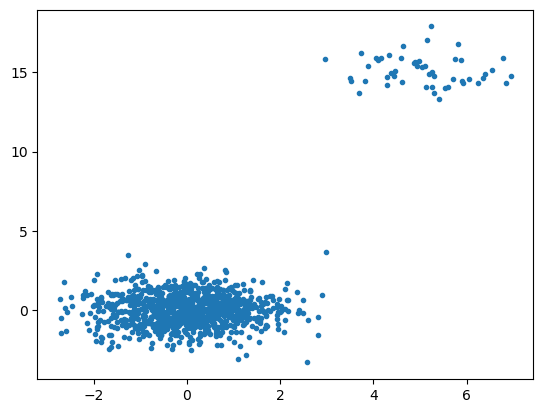

In [10]:
plt.plot(x[:,0],x[:,1],'.')